In [2]:
import pandas as pd
import numpy as np

path = '01. 패션.csv'
df = pd.read_csv(path)


In [3]:
df.columns.unique()

Index(['Index', 'RawText', 'Source', 'Domain', 'MainCategory', 'ProductName',
       'ReviewScore', 'Syllable', 'Word', 'RDate', 'GeneralPolarity',
       'Aspects'],
      dtype='object')

In [4]:
df_1 = df.copy()
df_1 = df_1[['Index', 'RawText', 'ReviewScore']]
df_1

,Index,RawText,ReviewScore
0,7,가격이 착하고 디자인이 예쁩니다,100
1,9,싸고 디자인이 예뻐요. . 정말 가성비 가심비 입니다,100
2,15,편하고 디자인이 예뻐요 가격도 좋아요 시원해요 빨리 마르고 이것만 입게되요,100
3,17,너무 착한가격에 감사합니다 윈하는 색은 없지만,100
4,18,가격이 너무 좋아서 블랙 구매했습니다 그런데 소재도 맘에 들어 흰색도 ...,100
...,...,...,...
44991,198798,"일단 색상이 넘 좋으네요. 첫 커리어가 ㅇㅇㅇ 였는데, 금방 바퀴가 부셔져서 버리...",100
44992,198799,가격대비 괜찮아요 근데 어깨에 매는 사이즈 끈이 자꾸 빠져서 그냥 손으로 들고 다녔...,100
44993,198803,20년전에 화물용하나에 이십만원준거 무겁고 바퀴부서지고 이건 가격 너무좋고 견고해...,100
44994,198805,무늬가 고급스럽고 이쁘네요^^ 여행갈때 5종세트만 있으면 따로 가방 준비할건 없을듯...,100


In [47]:
df_1['label'] = [1. if x >= 70 else 0. for x in df_1['ReviewScore']]  #스코어 70이상은 긍정 라벨을 붙임
df_1

,Index,RawText,ReviewScore,label
0,7,가격이 착하고 디자인이 예쁩니다,100,1.0
1,9,싸고 디자인이 예뻐요. . 정말 가성비 가심비 입니다,100,1.0
2,15,편하고 디자인이 예뻐요 가격도 좋아요 시원해요 빨리 마르고 이것만 입게되요,100,1.0
3,17,너무 착한가격에 감사합니다 윈하는 색은 없지만,100,1.0
4,18,가격이 너무 좋아서 블랙 구매했습니다 그런데 소재도 맘에 들어 흰색도 ...,100,1.0
...,...,...,...,...
44991,198798,"일단 색상이 넘 좋으네요. 첫 커리어가 ㅇㅇㅇ 였는데, 금방 바퀴가 부셔져서 버리...",100,1.0
44992,198799,가격대비 괜찮아요 근데 어깨에 매는 사이즈 끈이 자꾸 빠져서 그냥 손으로 들고 다녔...,100,1.0
44993,198803,20년전에 화물용하나에 이십만원준거 무겁고 바퀴부서지고 이건 가격 너무좋고 견고해...,100,1.0
44994,198805,무늬가 고급스럽고 이쁘네요^^ 여행갈때 5종세트만 있으면 따로 가방 준비할건 없을듯...,100,1.0


In [48]:
#리뷰에 중복데이터가 있는지 확인 nunique()
df_1['RawText'].nunique(), df_1['ReviewScore'].nunique(), df_1['label'].nunique()

(44996, 11, 2)

In [49]:
df_1.info() #중복 데이터가 없고, null값도 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44996 entries, 0 to 44995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        44996 non-null  int64  
 1   RawText      44996 non-null  object 
 2   ReviewScore  44996 non-null  int64  
 3   label        44996 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [50]:
#훈련과 테스트 데이터를 3:1로 분리
from sklearn.model_selection import train_test_split

X = df_1.drop(['label'], axis=1)
y = df_1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

<Axes: xlabel='label'>

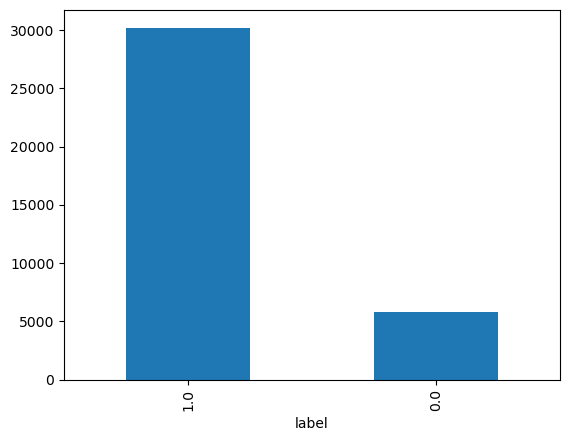

In [51]:
#레이블 분포 확인
y_train.value_counts().plot(kind = 'bar')

In [52]:
y_train.value_counts() 

label
1.0    30219
0.0     5777
Name: count, dtype: int64

In [53]:
X_train.count()

Index          35996
RawText        35996
ReviewScore    35996
dtype: int64

테스트 데이터를 전처리

In [57]:
# 한글과 공백을 제외 모두 제거
X_test['RawText'] = X_test['RawText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_test['RawText'].replace('', np.nan, inplace=True) #제거 후에 공백만 남았다면 null값으로
print(X_test.isnull().sum()) #null 값이 있는지 확인

X_test['RawText'] = X_test['RawText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
X_test['RawText'].replace('', np.nan, inplace=True) #제거 후에 공백만 남았다면 null값으로
print(X_test.isnull().sum()) #null 값이 있는지 확인

Index          0
RawText        0
ReviewScore    0
dtype: int64
Index          0
RawText        0
ReviewScore    0
dtype: int64


In [58]:
print(X_test)

        Index                                            RawText  ReviewScore
40931  186817  상붐 퀄리티는 좋으네요. 다른분들이 말씀사신거 처럼 사이즈가 한치수  큰듯 하네요....           80
11661   13194  이건 도무지 말도 안되는 가격입니다.그냥 무료로 줬다는 표현까지 쓰내요 주변에서^^...          100
29826  190214  사이즈 많이 큽니다 볼도 많이 넓구요 심지어 225랑 230이 크기랑 볼넓이가 똑같...           30
25886  121640    여름용이라 굉장히 가볍고 그렇게 불편하진 않아요. 100사이즈인데 약간 큰듯 합니다.          100
6355    64747    벤딩이 입기 너무 편하게 잘 되어있어요 출근할때 별생각 없이 입을 수 있어서 좋아요           100
...       ...                                                ...          ...
5581    63056  편하고 따뜻하고 핏이 예쁘다는 후기랑 기장도 다 다르고 집에서만 입을것 같다는 엇갈...          100
30370  839985       너무편해보여서구입했는데정말따뜻하고편안하게잘신었어요 싸이즈는정싸이즈사셔도될것같아요          100
10464   90067  10종에 이가격 감동입니다. 상평보고 한사이즈 업했더니 잘 맞아요. 근대 소재가 너...          100
911     45611      모델착용샷처럼 종아리통이 좁지않음 줄여입어야함.  사이즈가 2인치 단위라 아쉽네요           80
27395  128520  신랑 선물로 샀는데 ㅎㅎ 입으니 편하데요 ㅡ 살짝 스판끼때문에 바지가 헐렁한 느낌도...           80

[9000 rows x 3 columns]


벡터화 진행

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 텍스트 데이터를 벡터화
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['RawText'])
X_test_vectorized = vectorizer.transform(X_test['RawText'])
##Xtrain넣을게 아니라 'RT'컬럼만 넣는 것.

---

나이브 베이즈 사용

In [60]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [61]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_vectorized)

In [62]:
import pandas as pd

y_pred_series = pd.Series(y_pred)

value_counts = y_pred_series.value_counts()

print(value_counts)

1.0    8389
0.0     611
Name: count, dtype: int64


In [63]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8745555555555555


긍부정 리뷰 각각 중요한 단어들 10개

In [64]:
import numpy as np

# 클래스별 특성의 로그 확률 가져오기 
# #특성의 로그확률은 각 특성이 특정 클래스에 속할 확률. 높을수록 결정적이니까, 그만큼 중요한 특성
log_prob = model.feature_log_prob_

# 특성 이름 가져오기
feature_names = np.array(vectorizer.get_feature_names_out())

# 긍정 클래스 가장 중요한 특성 10개 출력
print("Top 10 Most Informative Features for Positive Class:")
positive_features = feature_names[np.argsort(log_prob[1])[::-1][:10]] #역순으로 해서 descending 정렬
positive_features_log = np.argsort(log_prob[1])[::-1][:10]
print(positive_features)


# 부정 클래스 가장 중요한 특성 10개 출력
print("Top 10 Most Informative Features for Negative Class:")
negative_features = feature_names[np.argsort(log_prob[0])[::-1][:10]]
print(negative_features)

Top 10 Most Informative Features for Positive Class:
['좋아요' '너무' '편하고' '같아요' '맘에' '좋고' '가볍고' '조금' '가격대비' '좋네요']
Top 10 Most Informative Features for Negative Class:
['너무' '그냥' '사이즈가' '품질이' '많이' '같아요' '조금' '사이즈' '신고' '생각보다']


In [20]:
import nltk

positive_reviews = df_1.loc[df_1['ReviewScore'] >= 70, 'RawText']
negative_reviews = df_1.loc[df_1['ReviewScore'] < 70, 'RawText']

# 토큰화 후 단어 수 계산
positive_lengths = [len(nltk.word_tokenize(review)) for review in positive_reviews]
negative_lengths = [len(nltk.word_tokenize(review)) for review in negative_reviews]

# 평균 길이 계산
average_positive_length = sum(positive_lengths) / len(positive_lengths)
average_negative_length = sum(negative_lengths) / len(negative_lengths)

print("Average Length of Positive Reviews:", average_positive_length)
print("Average Length of Negative Reviews:", average_negative_length)

Average Length of Positive Reviews: 15.531130103458313
Average Length of Negative Reviews: 19.367763431903374


-----

문장 하나로 테스트

In [40]:
new_words = '진짜 별로다 사이즈 큼'
new_words_vectorized = vectorizer.transform([new_words])
y_pred_2 = model.predict(new_words_vectorized)

y_pred_2

ValueError: X has 4 features, but MultinomialNB is expecting 104870 features as input.

In [45]:
new_words = '진짜 별로다 사이즈 큼'

X_train_new = X_test['RawText'].append(new_words)

# 새로운 문장을 기존에 사용한 벡터화기로 변환
new_words_vectorized = vectorizer.transform([new_words])

# 모델을 다시 훈련
model.fit(X_train_vectorized_new, y_train)

# 새로운 문장에 대해 예측
y_pred_2 = model.predict(new_words_vectorized)

print(y_pred_2)

AttributeError: 'Series' object has no attribute 'append'